In [ ]:
#Analyze scooter availability in the Month of June by day and date.

In [7]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime as dt
%matplotlib inline
import numpy as np
from folium import plugins
import seaborn as sns

In [8]:
june= pd.read_csv('data/june.csv')

In [9]:
month=[]
day=[]
year=[]
june['pubdatetime'] =  pd.to_datetime(june['pubdatetime'])
month = june['pubdatetime'].dt.month
day= june['pubdatetime'].dt.day
year= june['pubdatetime'].dt.year      

june['Day']=pd.Series(day)
june['Month']=pd.Series(month)

In [68]:
june[(june['Day']==23)].count()

pubdatetime    689155
latitude       689155
longitude      689155
sumdid         689155
sumdtype       689155
chargelevel    689138
sumdgroup      689155
costpermin     689155
companyname    689155
Day            689155
Month          689155
dtype: int64

In [73]:
june_temp = june

In [75]:
june_temp=june.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])

In [77]:
june_temp = june_temp.drop_duplicates(subset=['sumdid','Day'],keep='first')

In [86]:
june['sumdid'].nunique()

7828

In [85]:
june_temp['sumdid'].nunique()

7828

In [79]:
june_temp[(june_temp['Day']==14)].count()

sumdid    5059
Day       5059
dtype: int64

In [11]:
mon = [3,10,17,24]
tue=[4,11,18,25]
wed = [5,12,19,26]
thur = [6,13,20,27]
fri=[7,14,21,28]
sat = [1,8,15,22,29]
sun = [2,9,16,23,30]


Monday = june[june['Day'].isin(mon)]
Tuesday = june[june['Day'].isin(tue)]
Wednesday = june[june['Day'].isin(wed)]
Thursday = june[june['Day'].isin(thur)]
Friday = june[june['Day'].isin(fri)]
Saturday = june[june['Day'].isin(sat)]
Sunday = june[june['Day'].isin(sun)]

In [12]:
Monday['day']='Monday'
Tuesday['day']='Tuesday'
Wednesday['day']='Wednesday'
Thursday['day']='Thursday'
Friday['day']='Friday'
Saturday['day']='Saturday'
Sunday['day']='Sunday'

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [13]:
Monday=Monday.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])
Tuesday=Tuesday.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])
Wednesday=Wednesday.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])
Thursday=Thursday.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])
Friday=Friday.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])
Saturday=Saturday.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])
Sunday=Sunday.drop(columns=['pubdatetime','latitude','longitude','sumdtype','chargelevel','sumdgroup','costpermin','companyname','Month'])


In [14]:
Monday = Monday.drop_duplicates(subset=['sumdid'],keep='first')
Tuesday = Tuesday.drop_duplicates(subset=['sumdid'],keep='first')
Wednesday = Wednesday.drop_duplicates(subset=['sumdid'],keep='first')
Thursday = Thursday.drop_duplicates(subset=['sumdid'],keep='first')
Friday = Friday.drop_duplicates(subset=['sumdid'],keep='first')
Saturday = Saturday.drop_duplicates(subset=['sumdid'],keep='first')
Sunday = Sunday.drop_duplicates(subset=['sumdid'],keep='first')

In [92]:
Wednesday['sumdid'].nunique()

7119

In [93]:
Wednesday

,sumdid,Day,day
3877271,Powered658786,5,Wednesday
3877272,Powered974900,5,Wednesday
3877273,Powered596850,5,Wednesday
3877274,Powered457194,5,Wednesday
3877275,Powered435826,5,Wednesday
...,...,...,...
24317167,PoweredHK4N1,26,Wednesday
24320849,PoweredTDTF6,26,Wednesday
24327911,Powered402686,26,Wednesday
24339320,Powered805047,26,Wednesday


In [17]:
#concatenate june
d = [Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday]
june_usage = pd.concat(d)

In [18]:
june_usage

,sumdid,Day,day
1876557,PoweredYXBSW7L6G6ABR,3,Monday
1876558,PoweredNKUMT6YXFII6C,3,Monday
1876559,PoweredKJNZEPIJMYQ2X,3,Monday
1876560,PoweredO3ECDDTOIY4QL,3,Monday
1876561,PoweredMGEISI7XMH5YU,3,Monday
...,...,...,...
27981352,PoweredAKEA4,30,Sunday
28005300,Powered260618,30,Sunday
28012159,Powered749778,30,Sunday
28025864,Powered211807,30,Sunday


In [19]:
# mon = [3,10,17,24]
# tue=[4,11,18,25]
# wed = [5,12,19,26]
# thur = [6,13,20,27]
# fri=[7,14,21,28]
# sat = [1,8,15,22,29]
# sun = [2,9,16,23,30]

dates = [2,9,16,23,30]
scooters = []
for i in dates:
    day_one_scooters = june_usage[(june_usage['Day']==i)]
    
    count_days = day_one_scooters.count()
    scooters.append(count_days)
print(scooters)
sum(scooters)/len(scooters)

[sumdid    5697
Day       5697
day       5697
dtype: int64, sumdid    765
Day       765
day       765
dtype: int64, sumdid    416
Day       416
day       416
dtype: int64, sumdid    221
Day       221
day       221
dtype: int64, sumdid    505
Day       505
day       505
dtype: int64]


sumdid    1520.8
Day       1520.8
day       1520.8
dtype: float64

In [71]:
july[(july['Day']==23)].count()

sumdid    1520.8
Day       1520.8
day       1520.8
dtype: float64

In [21]:
days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
Number = [1787,1783,1779,1785,1804,1531,1521]

In [22]:

week_scooters = pd.DataFrame(list(zip(days, Number)), 
               columns =['Day', 'Number_of_Scooters']) 

In [23]:
week_scooters.to_csv('data/number_of_scooters_weekdays_june.csv')

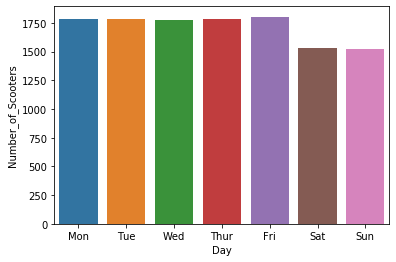

In [28]:
sns.barplot(x='Day',y='Number_of_Scooters',data=week_scooters);

In [69]:
len(june_usage[(june_usage['Day']==23)])

221

In [80]:
date = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
num_scooters = []

for i in date:
    day_one_scooters = len(june_temp[(june_temp['Day']==i)])
   # count_days = day_one_scooters.count()
    num_scooters.append(day_one_scooters)

In [81]:
day_scooters = pd.DataFrame(list(zip(date, num_scooters)), 
               columns =['Day', 'Number_of_Scooters']) 

In [82]:
day_scooters.to_csv('data/june_daily_scooters.csv')

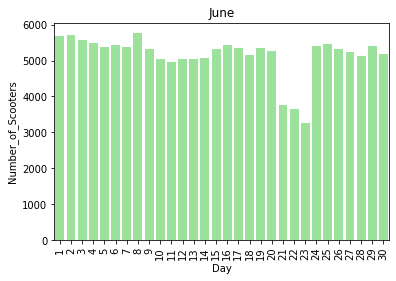

In [83]:
sns.barplot(x='Day',y='Number_of_Scooters',data = day_scooters,color='lightgreen')
plt.title('June')
plt.xticks(rotation='vertical');

In [102]:
mon = [3,10,17,24]
tue=[4,11,18,25]
wed = [5,12,19,26]
thur = [6,13,20,27]
fri=[7,14,21,28]
sat = [1,8,15,22,29]
sun = [2,9,16,23,30]

hold=[]
for i in sun:
    hold.append(day_scooters.iloc[i-1,1])
sum(hold)/len(hold)

4977.6

In [103]:
days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
num_scoots = [5339,5256,5279,5250,4830,5166,4977]

weekdays_scooters = pd.DataFrame(list(zip(days, num_scoots)), 
               columns =['Day', 'Number_of_Scooters']) 

In [106]:
weekdays_scooters.to_csv('data/number_of_scooters_weekdays_june.csv')